In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from tqdm.notebook import trange
#from TaPR_pkg import etapr
from pathlib import Path
import time

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100


In [2]:
import os
abspath = os.path.abspath("D:/dacon/HAI/HAICon2021_dataset/train/")
abspath2 = os.path.abspath("D:/dacon/HAI/HAICon2021_dataset/validation/")
abspath3 = os.path.abspath("D:/dacon/HAI/HAICon2021_dataset/test/")
abspath4 = os.path.abspath("D:/dacon/HAI/HAICon2021_dataset/")
os.listdir(abspath)

['train1.csv',
 'train2.csv',
 'train3.csv',
 'train4.csv',
 'train5.csv',
 'train6.csv']

In [3]:
TRAIN_DATASET = sorted([x for x in Path(abspath).glob("*.csv")])
TRAIN_DATASET

[WindowsPath('D:/dacon/HAI/HAICon2021_dataset/train/train1.csv'),
 WindowsPath('D:/dacon/HAI/HAICon2021_dataset/train/train2.csv'),
 WindowsPath('D:/dacon/HAI/HAICon2021_dataset/train/train3.csv'),
 WindowsPath('D:/dacon/HAI/HAICon2021_dataset/train/train4.csv'),
 WindowsPath('D:/dacon/HAI/HAICon2021_dataset/train/train5.csv'),
 WindowsPath('D:/dacon/HAI/HAICon2021_dataset/train/train6.csv')]

In [4]:
VALIDATION_DATASET = sorted([x for x in Path(abspath2).glob("*.csv")])
VALIDATION_DATASET

[WindowsPath('D:/dacon/HAI/HAICon2021_dataset/validation/validation.csv')]

In [5]:
TEST_DATASET = sorted([x for x in Path(abspath3).glob("*.csv")])
TEST_DATASET

[WindowsPath('D:/dacon/HAI/HAICon2021_dataset/test/test1.csv'),
 WindowsPath('D:/dacon/HAI/HAICon2021_dataset/test/test2.csv'),
 WindowsPath('D:/dacon/HAI/HAICon2021_dataset/test/test3.csv')]

In [6]:
def dataframe_from_csv(target):
    return pd.read_csv(target, engine='python').rename(columns=lambda x: x.strip())

def dataframe_from_csvs(targets):
    return pd.concat([dataframe_from_csv(x) for x in targets])

In [7]:
TRAIN_DATASET = dataframe_from_csvs(TRAIN_DATASET)
TRAIN_DATASET

KeyboardInterrupt: 

In [8]:
VALIDATION_DATASET = dataframe_from_csvs(VALIDATION_DATASET)
TEST_DATASET = dataframe_from_csvs(TEST_DATASET)
VALIDATION_DATASET

,timestamp,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,attack
0,2021-07-10 00:00:01,-2.0395,0,11.78894,0.00058,16.32080,0.4010,12.903438,70,1,50,10289,11.68213,28.03510,27181,27.84305,29.50472,0,1,50,27.796206,31.04248,1,334.58112,437.98016,3,50,18131,1.04366,1,54830,1032.43347,57.25861,4.9870,0,129.60573,2880,27.736847,0,0,84.15223,6.8489,0.00065,11.82125,12.00081,83.41660,25,47.83783,1,0,0,45.33997,1,71.77734,0.44952,0,292.86029,431.328095,20.989594,51.26343,720.02826,1,927,0,0,15184,0.059445,14.91310,10000,1,300.11276,35.00000,15.09755,264.01520,438.15259,30.90057,50.63332,1.22543,31.52100,0.716042,386.51172,356.64423,1,1034.712769,12.0,50,161,0
1,2021-07-10 00:00:02,-2.1750,0,11.78894,-0.00282,15.95459,0.4187,12.903438,70,1,50,10266,11.68213,28.03419,27174,27.84305,29.41619,0,1,50,27.796206,31.04248,1,332.97162,437.62238,2,50,18111,1.04217,1,54829,1032.43347,57.06784,5.3008,0,129.60573,2880,27.736847,0,0,89.49278,7.0499,0.02691,11.80655,11.96780,100.00000,25,47.58606,1,0,0,45.33997,1,74.29114,0.44723,0,295.82605,431.328095,20.989594,51.26343,719.85382,1,926,0,0,14224,0.059445,14.95540,9999,1,298.12650,35.00000,14.71477,264.01520,465.95908,30.88531,50.64244,1.22543,31.51756,0.716042,411.33905,352.08698,1,1034.712769,12.0,50,155,0
2,2021-07-10 00:00:03,-2.5854,0,11.78131,-0.00398,14.79492,0.0691,12.903438,70,1,50,10238,11.68213,28.03429,27172,27.84305,29.31749,0,1,50,27.796206,31.04248,1,332.15784,437.11121,2,50,18100,1.03920,1,54828,1031.79565,56.68636,4.5175,0,129.60573,2880,27.736847,0,0,86.82250,6.8409,-0.00709,11.84254,11.92001,100.00000,25,48.85254,1,0,0,45.33997,1,70.54761,0.43884,0,300.02173,431.328095,20.989594,51.26343,719.92407,1,927,0,0,12368,0.059445,14.99200,9999,1,297.13321,35.00000,14.30731,263.63373,452.05582,30.58014,50.65156,1.21475,31.50269,0.716042,438.15259,347.63818,1,1034.712769,12.0,50,149,0
3,2021-07-10 00:00:04,-2.4722,0,11.78894,-0.00152,14.72626,0.3306,12.903438,70,1,50,10215,11.68213,28.03686,27168,27.84305,29.26632,0,1,50,27.796206,31.04248,1,330.96429,437.16232,2,50,18000,1.03222,1,54829,1033.07117,56.68636,5.4640,0,129.60573,2880,27.736847,0,0,83.38927,7.2548,0.00760,11.93167,11.93456,100.00000,25,50.72937,1,0,8,45.33997,1,59.44373,0.42435,0,302.10144,431.328095,20.989594,51.26343,720.02954,1,924,0,0,11888,0.059445,15.01359,9999,1,295.14697,35.00000,14.54943,264.39661,434.18011,30.06897,50.68747,1.20255,31.47942,0.716042,465.95908,340.33203,1,1034.712769,12.0,50,148,0
4,2021-07-10 00:00:05,-2.2319,0,11.78131,0.00072,14.78729,0.2150,12.903438,70,1,50,10085,11.68213,28.02990,27172,27.84305,29.20597,0,1,50,27.796206,31.04248,1,329.02917,437.11121,2,50,17852,1.02947,1,54830,1031.47668,55.73270,4.5850,0,129.60573,2880,27.736847,0,0,79.00238,6.7417,0.00152,11.85563,11.96912,100.00000,25,52.65198,1,0,688,45.33997,1,57.27356,0.40451,0,305.03113,431.328095,20.989594,51.14899,720.02905,1,927,0,0,10688,0.059445,15.04767,9999,1,295.14697,35.00000,15.24461,263.44296,411.33905,30.05371,50.64556,1.20483,31.47942,0.716042,452.05582,335.17798,1,1034.712769,12.0,50,148,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,2021-07-10 23:59:56,-2.8150,0,12.26196,0.00130,15.53497,-0.0507,12.669310,70,1,50,6494,14.42108,28.02736,27265,27.86172,37.79226,0,1,50,27.796206,31.98853,1,354.96240,455.76889,3,50,19244,1.24152,1,54727,1021.90936,70.03782,5.2654,0,109.91794,2880,27.804180,0,0,335.92218,7.5729,0.00007,14.39386

In [14]:
TEST_DATASET.columns

Index(['timestamp', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08',
       'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18',
       'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28',
       'C29', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38',
       'C39', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48',
       'C49', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58',
       'C59', 'C60', 'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68',
       'C69', 'C70', 'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78',
       'C79', 'C80', 'C81', 'C82', 'C83', 'C84', 'C85', 'C86', 'attack'],
      dtype='object')

In [51]:
def plot(DATA,columns):
    
    error_df = pd.DataFrame({'Reconstruction_error': DATA[columns] ,
                            'True_class': list(DATA['attack'])})

    groups = error_df.groupby('True_class')
    fig, ax = plt.subplots(figsize=(20,20))
    for name, group in groups:
        ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
                label= "Break" if name == 1 else "Normal")
        
    plt.title("%s" % columns)
    plt.ylabel("value")
    plt.xlabel("columns")
    plt.savefig('./PLOT/distance/test/'+columns+'.png')
    #plt.show()
    return

TIMESTAMP_FIELD = "timestamp"
IDSTAMP_FIELD = 'id'
ATTACK_FIELD = "attack"
#VALID_COLUMNS_IN_TRAIN_DATASET = VALIDATION_DATASET.columns.drop([TIMESTAMP_FIELD])
#VALID_COLUMNS_IN_TRAIN_DATASET
TEST_DATASET['attack'] = 0
for col in TEST_DATASET.columns[1:]:
    plot(TEST_DATASET,col)

# ATTACK 지점


In [9]:
#attack 지점 찾기
attack_start =[]
attack_list = list(attack_df.index)

attack_start.append(attack_list[0])
for i in range(len(attack_list)-3):
    if int(attack_list[i])+3 != attack_list[i+3]:
        attack_start.append(attack_list[i])
    
attack_start

NameError: name 'attack_df' is not defined

# 거리 기준으로 보기

In [29]:
VALID = pd.DataFrame(np.diff(VALIDATION_DATASET,axis = 0))
VALID.columns = VALIDATION_DATASET.columns
VALID['attack'] = VALIDATION_DATASET['attack']
for col in VALIDATION_DATASET.columns:
    plot(VALID,col)

In [ ]:
TRAIN = pd.DataFrame(np.diff(TRAIN_DATASET,axis = 0))
TRAIN.columns =TRAIN_DATASET.columns
TRAIN['attack'] = 0
for col in TRAIN.columns:
    plot(TRAIN,col)

In [32]:
del TRAIN_DATASET['timestamp']

In [37]:
TRAIN

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,attack
0,-0.2281,0.0,0.0,0.00145,0.55695,-0.2965,0.0,0.0,0.0,0.0,143.0,0.00763,-0.00517,1.0,0.0,-0.00187,0.0,0.0,0.0,0.0,-0.01525,0.0,1.04895,-0.35782,33.0,0.0,39.0,0.00115,0.0,0.0,1.91345,-0.76295,-0.7845,0.0,0.0,0.0,0.0,0.0,0.0,-4.19619,-0.2773,0.00022,-0.01652,-0.01811,0.00000,0.0,1.76238,0.0,0.0,0.0,0.00000,0.0,0.00000,-0.03891,0.0,2.45947,0.0,0.0,0.00000,0.14038,0.0,0.0,0.0,0.0,0.0,0.0,-0.10516,0.0,0.0,-2.97915,-0.00918,0.69559,-0.76295,-46.67514,0.00000,0.04680,0.00000,0.00381,0.0,-63.55787,-0.21704,0.0,0.0,0.0,0.0,-13.0,0
1,-0.3537,0.0,0.0,-0.00130,1.92261,0.0762,0.0,0.0,0.0,0.0,106.0,0.00000,0.00335,-1.0,0.0,-0.00677,0.0,0.0,0.0,0.0,0.00000,0.0,0.81378,0.00000,-6.0,0.0,50.0,0.00217,0.0,0.0,-1.27564,1.33513,0.8202,0.0,0.0,0.0,0.0,0.0,0.0,2.67028,0.5325,0.00000,0.18107,-0.03988,0.00000,0.0,0.19837,0.0,0.0,8.0,0.00000,0.0,0.00000,-0.00610,0.0,-0.01806,0.0,0.0,0.00000,-0.14038,0.0,0.0,0.0,0.0,0.0,0.0,-0.07068,0.0,0.0,-3.97244,-0.00919,0.33329,-0.57218,-21.84814,0.00763,-0.05780,-0.00382,0.00725,0.0,-80.44064,3.67120,0.0,0.0,0.0,0.0,-3.0,0
2,0.7225,0.0,0.0,0.00173,1.44195,0.1791,0.0,0.0,0.0,0.0,98.0,0.00000,0.00006,1.0,0.0,0.02276,0.0,0.0,0.0,0.0,0.00000,0.0,1.88080,-0.56228,-16.0,0.0,86.0,0.00378,0.0,0.0,-1.01703,0.38149,-0.3881,0.0,0.0,0.0,0.0,0.0,0.0,5.91280,-0.4826,0.00000,0.11858,0.09424,0.00000,0.0,-1.46484,0.0,0.0,0.0,0.00000,0.0,0.00000,0.00839,0.0,1.59149,0.0,0.0,0.00000,0.03534,0.0,0.0,0.0,0.0,0.0,0.0,-0.07883,0.0,0.0,6.95159,-0.00918,-0.23105,0.57218,13.90325,-0.00763,0.06848,-0.00229,0.01259,0.0,-46.67514,1.64563,0.0,0.0,0.0,0.0,35.0,0
3,-0.7839,0.0,0.0,-0.00058,0.17548,0.0000,0.0,0.0,0.0,0.0,129.0,0.00000,0.00000,0.0,0.0,-0.00248,0.0,0.0,0.0,0.0,0.01525,0.0,1.15741,0.25555,-5.0,0.0,80.0,-0.00023,0.0,-1.0,1.01703,-0.38149,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,6.67569,0.0000,-0.00022,0.13210,0.00000,0.00000,0.0,-1.96076,0.0,0.0,0.0,0.00000,0.0,0.00000,0.02365,0.0,2.98389,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,-0.09159,0.0,0.0,1.98624,-0.00919,-0.51010,-0.19071,30.78599,0.00000,0.06273,0.00153,-0.00076,0.0,-21.84814,-0.16278,0.0,0.0,0.0,0.0,-22.0,0
4,0.3755,0.0,0.0,0.00167,0.00763,-0.0409,0.0,0.0,0.0,0.0,95.0,0.00000,-0.00436,4.0,0.0,0.02178,0.0,0.0,0.0,0.0,-0.01525,0.0,0.90417,-0.15335,-2.0,0.0,22.0,0.00801,0.0,1.0,-0.31885,0.00000,0.4788,0.0,0.0,0.0,0.0,0.0,0.0,11.25336,0.3799,0.00022,0.05116,-0.06236,48.41528,0.0,-1.86920,0.0,0.0,8.0,0.00000,0.0,0.00000,0.04197,0.0,-1.10315,0.0,0.0,0.00000,0.00055,0.0,0.0,0.0,0.0,0.0,0.0,-0.07884,0.0,0.0,-1.98624,-0.00918,-0.57717,0.38149,34.75808,0.00000,-0.01864,0.00076,0.04310,0.0,13.90325,3.77967,0.0,0.0,0.0,0.0,-31.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004396,-0.2322,0.0,0.0,0.00239,0.00000,-0.0804,0.0,0.0,0.0,0.0,-9.0,0.00000,-0.00087,8.0,0.0,-0.03709,0.0,0.0,0.0,0.0,0.00000,0.0,-1.03083,-0.20444,0.0,0.0,-105.0,-0.00126,0.0,0.0,-0.43481,-0.38149,0.0016,0.0,0.0,0.0,0.0,0.0,0.0,0.57202,0.0970,0.00000,-0.06826,-0.03103,0.00000,0.0,0.00000,0.0,0.0,0.0,0.01527,0.0,-0.27131,-0.00076,0.0,-2.13397,0.0,0.0,0.01526,-0.10468,0.0,0.0,0.0,0.0,-48.0,0.0,0.00000,0.0,0.0,3.97247,0.00000,0.00000,0.00000,-3.12793,0.00000,-0.00649,0.00229,-0.00419,0.0,2.87793,-0.92231,0.0,0.0,0.0,0.0,27.0,0
1004397,-0.2036,0.0,0.0,-0.00080,0.00000,-0.0468,0.0,0.0,0.0,0.0,-17.0,0.00000,0.00088,-12.0,0.0,-0.08464,0.0,0.0,0.0,0.0,0.01527,0.0,-0.65106,0.00000,0.0,0.0,-23.0,-0.00584,0.0,-1.0,0.00000,0.95367,0.1340,0.0,0.0,0.0,0.0,0.0,0.0,1.33496,0.1315,

In [23]:
VALIDATION_DATASET.columns

Index(['C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10',
       'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30',
       'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40',
       'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C50',
       'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C59', 'C60',
       'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68', 'C69', 'C70',
       'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C79', 'C80',
       'C81', 'C82', 'C83', 'C84', 'C85', 'C86', 'attack'],
      dtype='object')

In [43]:
tem = minmax_valid.mean(axis = 1)

def make_even(tem):
    window = 1000
    m =[]
    for i in range(len(tem)):
        if (i > window) and (i < (len(tem)-window)):
            tem_mean = tem[i-window:i+window].mean()
            m.append(tem_mean)
        else:
            m.append(tem[i])
    return m-tem

# DWT

In [39]:
import pywt

In [ ]:
    h_coff = pywt.swt(list(y_hori), 'db4',level=5,axis=0)
    v_coff = pywt.swt(list(y_verti), 'db4',level=5,axis = 0)
    
    
    # concat wavelet coff
    h_data = pd.concat([pd.DataFrame(i).T for i in h_coff],axis =1)
    v_data = pd.concat([pd.DataFrame(i).T for i in v_coff],axis =1)
    
    # set col name
    col_name = ['cA5','cD5','cA4','cD4','cA3','cD3','cA2','cD2','cA1','cD1']
    h_data.columns = col_name

In [84]:
len(dwt_df) % 1024

384

In [93]:
dwt_df = pywt.swt(list(VALIDATION_DATASET['C16'][:-384]), 'db4',level=5,axis=0)

In [94]:
VALID['C16']

0       -0.08853
1       -0.09870
2       -0.05117
3       -0.06035
4        0.00000
          ...   
86394   -0.00178
86395   -0.02044
86396   -0.01949
86397   -0.04116
86398   -0.01034
Name: C16, Length: 86399, dtype: float64

In [99]:
dwt_df = pd.concat([pd.DataFrame(i).T for i in dwt_df],axis =1)
#pd.DataFrame(dwt_df)
dwt_df.columns = ['cA5','cD5','cA4','cD4','cA3','cD3','cA2','cD2','cA1','cD1']


ValueError: DataFrame constructor not properly called!

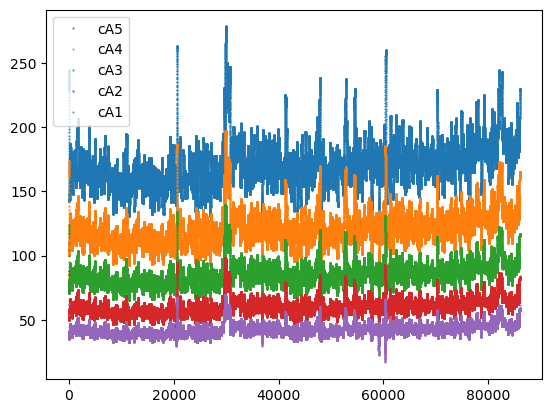

In [111]:
dwt_df.columns = ['cA5','cD5','cA4','cD4','cA3','cD3','cA2','cD2','cA1','cD1']

dwt_df.plot(y = [0,2,4,6,8],marker='o', ms=0.5, linestyle='')
plt.show()

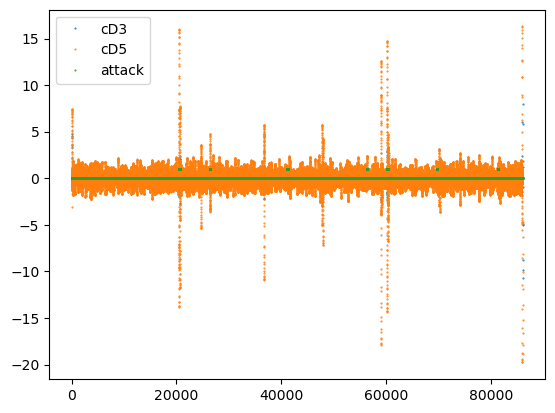

In [132]:
dwt_df.plot(y = ['cD3','cD5','attack'],marker='o', ms=0.5, linestyle='')

plt.show()

In [129]:
dwt_df['attack'] = VALIDATION_DATASET['attack'][:-384]

In [130]:
VALIDATION_DATASET['attack'].value_counts()

0    85515
1      885
Name: attack, dtype: int64

In [131]:
dwt_df

,cA5,cD5,cA4,cD4,cA3,cD3,cA2,cD2,cA1,cD1,attack
0,229.013754,-3.104144,161.728767,1.078478,116.697483,3.619037,85.525044,3.543852,62.030956,-0.139103,0
1,229.138902,-1.674541,162.174201,2.707706,117.740920,4.582813,87.731466,2.191362,53.972567,-0.567916,0
2,229.319952,-0.367944,162.735542,4.018412,119.036300,4.784855,88.185833,0.403565,44.691562,-0.071866,0
3,229.563478,0.812840,163.329138,5.053703,120.717805,4.289524,84.941313,-0.505408,41.587134,-0.084760,0
4,229.852944,1.873651,163.994211,5.812349,122.337449,3.372346,79.397076,-0.786016,41.456741,0.012363,0
...,...,...,...,...,...,...,...,...,...,...,...
86011,229.168502,-11.856454,162.448308,-11.417669,116.075986,-10.725238,83.388284,-1.095224,59.325752,0.004677,0
86012,229.054879,-10.015329,162.018415,-8.914100,115.648664,-8.829666,83.314998,-7.980735,59.575700,3.012665,0
86013,228.964529,-8.144787,161.657843,-6.071610,115.265979,-5.045500,82.669406,-5.235417,59.250039,-6.284875,0
86014,228.918178,-6.330787,161.457367,-3.285393,115.199909,-0.982778,82.550687,0.466629,58.946686,1.864020,0


In [128]:
VALIDATION_DATASET

,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,attack
0,-2.0395,0,11.78894,0.00058,16.32080,0.4010,12.903438,70,1,50,10289,11.68213,28.03510,27181,27.84305,29.50472,0,1,50,27.796206,31.04248,1,334.58112,437.98016,3,50,18131,1.04366,1,54830,1032.43347,57.25861,4.9870,0,129.60573,2880,27.736847,0,0,84.15223,6.8489,0.00065,11.82125,12.00081,83.41660,25,47.83783,1,0,0,45.33997,1,71.77734,0.44952,0,292.86029,431.328095,20.989594,51.26343,720.02826,1,927,0,0,15184,0.059445,14.91310,10000,1,300.11276,35.00000,15.09755,264.01520,438.15259,30.90057,50.63332,1.22543,31.52100,0.716042,386.51172,356.64423,1,1034.712769,12.0,50,161,0
1,-2.1750,0,11.78894,-0.00282,15.95459,0.4187,12.903438,70,1,50,10266,11.68213,28.03419,27174,27.84305,29.41619,0,1,50,27.796206,31.04248,1,332.97162,437.62238,2,50,18111,1.04217,1,54829,1032.43347,57.06784,5.3008,0,129.60573,2880,27.736847,0,0,89.49278,7.0499,0.02691,11.80655,11.96780,100.00000,25,47.58606,1,0,0,45.33997,1,74.29114,0.44723,0,295.82605,431.328095,20.989594,51.26343,719.85382,1,926,0,0,14224,0.059445,14.95540,9999,1,298.12650,35.00000,14.71477,264.01520,465.95908,30.88531,50.64244,1.22543,31.51756,0.716042,411.33905,352.08698,1,1034.712769,12.0,50,155,0
2,-2.5854,0,11.78131,-0.00398,14.79492,0.0691,12.903438,70,1,50,10238,11.68213,28.03429,27172,27.84305,29.31749,0,1,50,27.796206,31.04248,1,332.15784,437.11121,2,50,18100,1.03920,1,54828,1031.79565,56.68636,4.5175,0,129.60573,2880,27.736847,0,0,86.82250,6.8409,-0.00709,11.84254,11.92001,100.00000,25,48.85254,1,0,0,45.33997,1,70.54761,0.43884,0,300.02173,431.328095,20.989594,51.26343,719.92407,1,927,0,0,12368,0.059445,14.99200,9999,1,297.13321,35.00000,14.30731,263.63373,452.05582,30.58014,50.65156,1.21475,31.50269,0.716042,438.15259,347.63818,1,1034.712769,12.0,50,149,0
3,-2.4722,0,11.78894,-0.00152,14.72626,0.3306,12.903438,70,1,50,10215,11.68213,28.03686,27168,27.84305,29.26632,0,1,50,27.796206,31.04248,1,330.96429,437.16232,2,50,18000,1.03222,1,54829,1033.07117,56.68636,5.4640,0,129.60573,2880,27.736847,0,0,83.38927,7.2548,0.00760,11.93167,11.93456,100.00000,25,50.72937,1,0,8,45.33997,1,59.44373,0.42435,0,302.10144,431.328095,20.989594,51.26343,720.02954,1,924,0,0,11888,0.059445,15.01359,9999,1,295.14697,35.00000,14.54943,264.39661,434.18011,30.06897,50.68747,1.20255,31.47942,0.716042,465.95908,340.33203,1,1034.712769,12.0,50,148,0
4,-2.2319,0,11.78131,0.00072,14.78729,0.2150,12.903438,70,1,50,10085,11.68213,28.02990,27172,27.84305,29.20597,0,1,50,27.796206,31.04248,1,329.02917,437.11121,2,50,17852,1.02947,1,54830,1031.47668,55.73270,4.5850,0,129.60573,2880,27.736847,0,0,79.00238,6.7417,0.00152,11.85563,11.96912,100.00000,25,52.65198,1,0,688,45.33997,1,57.27356,0.40451,0,305.03113,431.328095,20.989594,51.14899,720.02905,1,927,0,0,10688,0.059445,15.04767,9999,1,295.14697,35.00000,15.24461,263.44296,411.33905,30.05371,50.64556,1.20483,31.47942,0.716042,452.05582,335.17798,1,1034.712769,12.0,50,148,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,-2.8150,0,12.26196,0.00130,15.53497,-0.0507,12.669310,70,1,50,6494,14.42108,28.02736,27265,27.86172,37.79226,0,1,50,27.796206,31.98853,1,354.96240,455.76889,3,50,19244,1.24152,1,54727,1021.90936,70.03782,5.2654,0,109.91794,2880,27.804180,0,0,335.92218,7.5729,0.00007,14.39386,11.89824,50.22482,25,18.82324,1,0,8,39.84681,1,0.56064,1.38260,0,347.45734,451.941960,20.989594,50.21057,720.00098,1,905,0,0,16,0.193

In [77]:
TEST_DATASET['C50'][TEST_DATASET['C50'] > 14000]

141149    14224
141150    14768
141151    15296
141152    15824
141153    16544
141154    16664
141155    16768
141156    16872
141157    16968
141158    17064
141159    17152
141160    17240
141161    17312
141162    17392
141163    17464
141164    17528
141165    17592
141166    17656
141167    17712
141168    17768
141169    17544
141170    17544
141171    16912
141172    16312
141173    15744
141174    15216
141175    14704
141176    14216
242384    14016
242385    14264
242386    14488
242387    14808
242388    15008
242389    15008
242390    15208
242391    15384
242392    15552
242393    15720
242394    15872
242395    16024
242396    16160
242397    16296
242398    16424
242399    16144
242400    15456
242401    14768
242402    14472
Name: C50, dtype: int64

In [90]:
TEST_DATASET['C50'].iloc[141149+2050:141149+2600]

143199    1440
143200    1368
143201    1296
143202    1232
143203    1168
          ... 
143744       0
143745       0
143746       0
143747       0
143748       0
Name: C50, Length: 550, dtype: int64

In [49]:
TEST_DATASET['C32']

0         51.53651
1         52.49024
2         51.53651
3         51.72729
4         52.10876
            ...   
274795    61.45473
274796    61.64551
274797    61.64551
274798    63.17135
274799    65.26945
Name: C32, Length: 274800, dtype: float64

In [44]:
TEST_DATASET.describe()

,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,attack
count,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.0,274800.0,274800.0,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.0,274800.0,274800.000000,274800.000000,274800.0,274800.000000,274800.000000,274800.000000,274800.0,274800.000000,274800.000000,274800.0,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.0,274800.000000,274800.0,274800.0,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.0,274800.000000,274800.000000,274800.0,274800.000000,274800.000000,274800.0,274800.000000,274800.000000,274800.0,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.0,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.000000,274800.0,274800.000000,274800.000000,274800.0,274800.000000,274800.0
mean,-2.690713,0.000418,12.083211,-0.000026,8.297553,-0.312005,12.589180,70.0,1.0,50.0,13251.349705,14.710807,28.034373,27050.774287,27.714673,30.798443,0.000113,1.0,50.0,27.567075,29.763831,1.0,334.299927,457.035195,776.161729,50.0,18271.534902,1.118553,1.0,54736.975728,993.203885,61.795589,5.419255,0.000113,112.209868,2880.0,25.566100,0.0,0.0,78.259026,7.729105,0.000118,14.874105,11.953816,84.943600,25.0,80.629226,0.999887,0.0,4929.470684,41.937110,1.0,32.521074,0.485478,0.0,334.038170,456.238434,17.816797,49.330100,720.013012,0.999887,906.849851,0.0,0.000113,6987.690888,0.125815,9.279115,9976.468133,0.999505,321.311440,20.876549,8.760158,244.316728,296.441533,31.294590,48.790446,1.118301,29.375247,5.018883,296.407937,366.698528,1.0,993.200363,12.003853,50.0,1121.606343,0.0
std,0.568128,0.020453,0.240035,0.001641,6.465559,0.481061,0.057858,0.0,0.0,0.0,4153.189903,3.409162,0.003675,71.700943,0.772048,3.719800,0.010621,0.0,0.0,0.203623,0.740966,0.0,35.746582,26.798369,1314.837946,0.0,1930.072722,0.112298,0.0,89.571566,31.413536,11.085437,0.666845,0.010621,7.957047,0.0,0.111575,0.0,0.0,148.237756,0.587716,0.002092,3.437091,0.273219,31.785354,0.0,28.906585,0.010621,0.0,5102.522608,4.793742,0.0,31.201697,0.303160,0.0,39.210912,25.311290,7.218500,1.559902,0.073062,0.010621,22.862428,0.0,0.010621,6765.889692,0.038901,13.482453,31.321891,0.022241,47.550823,15.211597,6.271717,15.525021,415.221099,3.772151,1.484043,0.111363,0.367961,2.690479,415.208883,59.691689,0.0,31.067213,0.157915,0.0,1700.333070,0.0
min,-4.380000,0.000000,11.781310,-0.011280,0.276180,-1.090400,0.000000,70.0,1.0,50.0,5728.000000,0.268550,28.019500,26855.000000,26.129270,0.000000,0.000000,1.0,50.0,27.330160,27.777100,1.0,232.693120,226.458280,-3.000000,50.0,12758.000000,0.776570,1.0,51648.000000,913.324280,0.419630,0.000000,0.000000,0.000000,2880.0,25.461390,0.0,0.0,1.373290,0.000000,-0.031900,0.000000,0.000020,15.000000,25.0,12.307740,0.000000,0.0,0.000000,34.445190,1.0,0.090420,0.309140,0.0,229.709230,410.712460,6.828800,43.359380,719.678410,0.000000,0.000000,0.0,0.000000,-112.000000,0.063240,0.000000,9669.000000,0.000000,2.184900,0.000000,0.000000,208.036960,7.150280,0.352480,42.637700,-0.012820,28.269350,2.403980,7.150280,230.523010,1.0,954.549500,12.000000,50.0,1.000000,0.0
25%,-3.129000,0.000000,11.903380,-0.001090,3.747560,-0.609300,12.588700,70.0,1.0,50.0,9518.000000,12.849430,28.031660,26989.000000,27.042940,28.447560,0.000000,1.0,50.0,27.330160,29.135130,1.0,313.784000,433.226290,3.000000,50.0,17158.000

In [48]:
TEST_DATASET.reset_index(drop= True, inplace= True)